# <span style="color : blue">Source </span> 
## https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook

# <span style="color : blue">Libray </span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(['ls', 'input']).decode('utf8'))

X.npy
Y.npy



# <span style="color : blue">Overview the Data set </span>

### 2062 sign language digits images (X.npy, Y.npy)
### digits --> 0~ 9까지 (총 10개의 unique sign)
### 하나의 sign의 index는 822~1027 (각 classes(labels)는 205개의 samples)
### X is image array (zero and one signs)
### Y is label array (0 and 1)

(-0.5, 63.5, 63.5, -0.5)

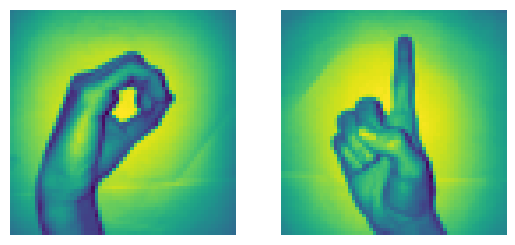

In [2]:
x_1 = np.load("input/X.npy")
y_1 = np.load("input/Y.npy")

img_size=64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

### image array를 만들기 위해, zero sign과 one sign을 배열로 한 줄 잇기
### zero/one sign image를 위한 label array 생성

In [3]:
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z,o), axis=0).reshape(X.shape[0],1)

print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (410, 64, 64)
Y.shape:  (410, 1)


###  <span style="color : red">Description </span>
#### - zero sign --> 0 to 204 (X array)
#### - one sign --> 205 to 410 (X array)
#### - zero sign --> 204 to 409 (x_1 array)
#### - one sign --> 822 to 1027 (x_1 array)
#### X.shape description
#### - 410 means : image 개수 (zero and one signs)
#### - 64 means : image size (64x64 pixels)
#### Y.shape description
#### - 410 means : label 개수 (0 and 1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

### 3 dimensional input array(X) --> make it flatten(2D) 
### Y (label array)는 이미 flatten

In [5]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


###  <span style="color : red">Description </span>
#### we have 348 images and each image has 4096 pixels in X_train_flatten.
#### we have 62 images and each image has 4096 pixels in X_test_flatten.

### Transpose (no reason)

In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


###  <span style="color : orange">What we did up to this point </span>

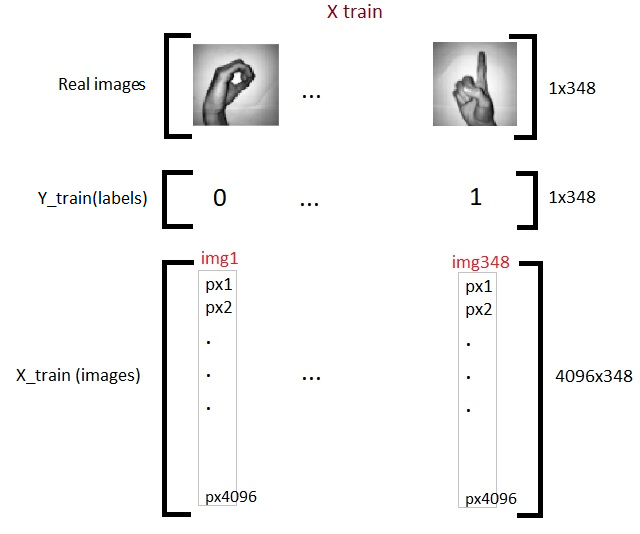

#  <span style="color : blue">Logistic Regression </span>

### Computation Graph

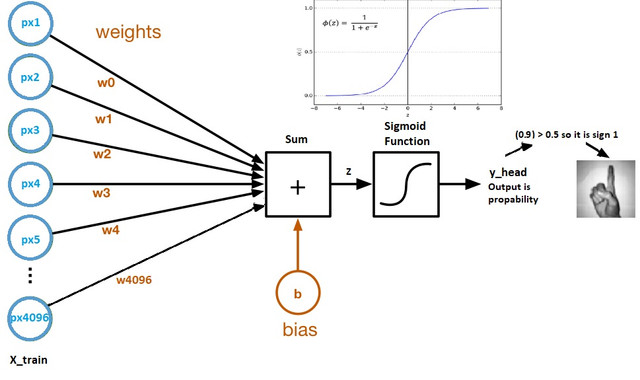

###  <span style="color : red">Description </span>
#### - weights : each pixel의 계수
#### - bias : intercept(절편)
#### - z = (weight) * x + b ==> z equals to (transpose of weights times input x) + bias (b)
#### 즉, z = b + px1 * w1 + px2 * w2 + ... + px4096 * w4096
#### - y_head = sigmoid(z)
#### - sigmoid function ==> z를 zero와 1 사이의 값으로 만들어줌.

###  <span style="color : orange">Why we use Sigmoid function </span>
#### - gives probabilistic result (확률론적 결과 제공)
#### - derivative --> gradient descent algorithm 사용 가능

###  <span style="color : purple">Example </span>
#### z = 4이고 z를 sigmoid function에 넣었다고 가정해보자
#### - 결과(y_head)는 약 0.9
#### - 이는 classification result가 90%의 가능성으로 1이라는 의미 

### Initializing parameters

#### 각 이미지는 4096개의 pixel을 가짐
#### 각 pixel은 고유의 weights가 있음
#### ==> 각 pixel * weights 수행
#### 여기에서의 최초 가중치 값은 0.01로 규정
#### 최초 bias 값은 0

In [7]:
# Example

def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter

result = dummy(3)    # result = 8


In [8]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1), 0.01)
    b = 0.0
    return w,b

# w,b = initialize_weights_and_bias(4096)

### Forward Propagation
#### The all steps from pixels to cost 

In [9]:
def sigmoid(z):   # calculation of z
    y_head = 1 / (1+np.exp(-z))   
    return y_head

# z = (w.T) * x + b
# z = np.dot(w.T, x_train)+b ==> np.dot = w.T * x_train
# sigmoid = 1 / (1+e의 -x승)

In [10]:
y_head = sigmoid(0)
y_head

0.5

### Loss function equation
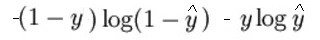

###  <span style="color : red">Description </span>
#### Forward propagation steps :
#### z = w.T * x + b
#### y_head = sigmoid(z)
#### loss(error) = loss(y, y_head)
#### cost = sum(loss)

In [11]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    # y = 1 - y_train
    # y^ = 1 - y_head
    # -(1-1-(-y_train))log(1-1-(-y_head))-(1-y_train)log(1-y_head)
    # -(y_train)log(y_head)-(1-y_train)log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]   # x_train.shape[1] is for scaling
    return cost


### Optimization Algorithm with Gradient Descent
#### cost는 낮을수록 좋음 (높으면 wrong prediction)
#### cost를 낮추려면 weights&bias update 해야 함 --> our model needs to learn the parameters weights and bias that minimize cost func.
#### 이를 gradient descent라 칭함

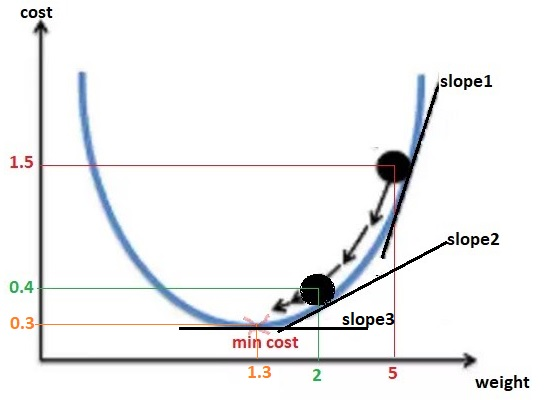
#### - weights : 5, bias : 0 ==> cost function : 1.5 (it looks like red lines)



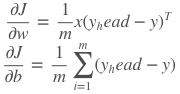

In [12]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    # y = 1 - y_train
    # y^ = 1 - y_head
    # -(1-1-(-y_train))log(1-1-(-y_head))-(1-y_train)log(1-y_head)
    # -(y_train)log(y_head)-(1-y_train)log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]   # x_train.shape[1] is for scaling
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight, "derivative_bias":derivative_bias}
    
    return cost, gradients


In [13]:
# updating learning parameters
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration %i: %f" %(i,cost))
    
    parameters = {'weight':w, 'bias':b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel('number of iteration')
    plt.ylabel('cost')
    plt.show()
    
    return parameters,gradients,cost_list

In [14]:
# prediction
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))    # 2D array 생성 (행과 열)
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:          # if z is smaller than 0.5
            Y_prediction[0,i] = 0  # prediction is sign zero (y_head=0)
        else:
            Y_prediction[0,i] = 1  # prediction is sign one (y_head=1)
            
    return Y_prediction

cost after iteration 0: 14.014222
cost after iteration 10: 2.544689
cost after iteration 20: 2.577950
cost after iteration 30: 2.397999
cost after iteration 40: 2.185019
cost after iteration 50: 1.968348
cost after iteration 60: 1.754195
cost after iteration 70: 1.535079
cost after iteration 80: 1.297567
cost after iteration 90: 1.031919
cost after iteration 100: 0.737019
cost after iteration 110: 0.441355
cost after iteration 120: 0.252278
cost after iteration 130: 0.205168
cost after iteration 140: 0.196168


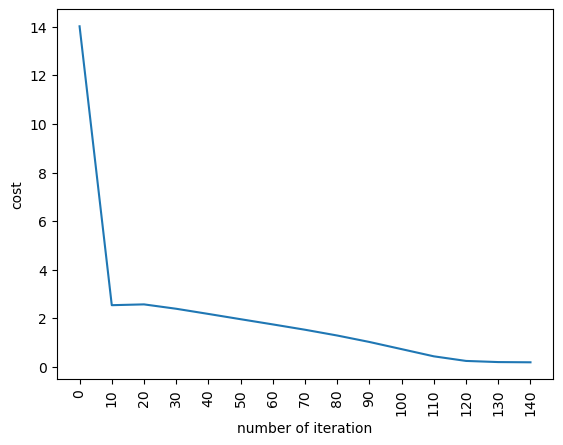

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [15]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension = x_train.shape[0]     # 4096
    w,b = initialize_weights_and_bias(dimension)
    
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters['weight'], parameters['bias'], x_test)
    y_prediction_train = predict(parameters['weight'], parameters['bias'], x_train)
    
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_train - y_train))*100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test))*100))
    
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=0.01,num_iterations=150)

In [16]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)
print("test accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871
train accuracy: 1.0


#  <span style="color : blue">Artificial Neural Network (ANN) </span>

### Neural Network --> 입력 - 적어도 하나의 은닉층 - 출력 순으로 layer  존재

###  <span style="color : purple">Example </span>
#### see 2 layer neural network (실제론 input, one hidden layer, output으로 3개지만 hidden layer는 안보이므로)
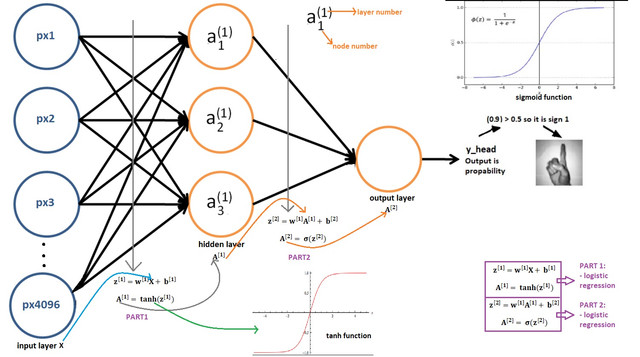

#### - tanh function : like sigmoid func. 
#### ==> better than sigmoid because of its output is close to zero so it centers the data better for the next layer


### 2-Layer Neural Network

#### Size of layers and initializing parameters weights and bias
#### Forward propagation
#### Loss function and Cost function
#### Backward propagation
#### Update Parameters
#### Prediction with learnt parameters weight and bias
#### Create Model

### Size of layers and initializing parameters weights and bias

In [17]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

### Forward propagation

In [18]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### Loss function and Cost function

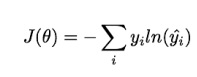

In [19]:
def compute_cost_NN(A2,Y,parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

### Backward propagation

In [20]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

### Update Parameters

In [21]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

### Prediction with learnt parameters weight and bias

In [22]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

### Create Model

Cost after iteration 0: 0.377231
Cost after iteration 100: 0.343725
Cost after iteration 200: 0.331379
Cost after iteration 300: 0.295932
Cost after iteration 400: 0.247526
Cost after iteration 500: 0.200481
Cost after iteration 600: 0.162298
Cost after iteration 700: 0.134216
Cost after iteration 800: 0.113731
Cost after iteration 900: 0.098483
Cost after iteration 1000: 0.086659
Cost after iteration 1100: 0.076971
Cost after iteration 1200: 0.068682
Cost after iteration 1300: 0.061483
Cost after iteration 1400: 0.055271
Cost after iteration 1500: 0.049919
Cost after iteration 1600: 0.045209
Cost after iteration 1700: 0.040887
Cost after iteration 1800: 0.036819
Cost after iteration 1900: 0.033183
Cost after iteration 2000: 0.030178
Cost after iteration 2100: 0.027739
Cost after iteration 2200: 0.025711
Cost after iteration 2300: 0.023983
Cost after iteration 2400: 0.022483


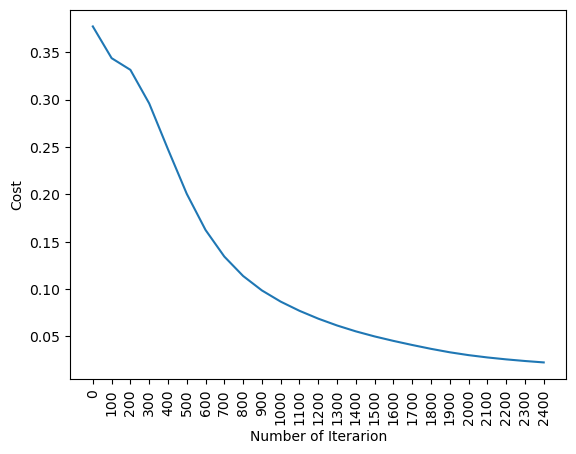

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [23]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

### Implementing with keras library
#### - units : output dimensions of node
#### - kernel_initializer : to initialize weights
#### - activation : activation func ('relu')
#### - input_dim : input dimension (number of pixels)
#### - optimizer : 'adam'
#### - loss : Cost func
#### - metrics : accuracy
#### - cross_val_score : cross validation
#### - epochs : num of iteration

In [24]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)

mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Metal device set to: Apple M2


2023-01-29 15:30:13.034808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-29 15:30:13.035199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-01-29 15:30:13.403041: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-29 15:30:13.572748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5431
Epoch 11/100
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5431
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5431
Epoch 94/100
8/8 [===============

2023-01-29 15:30:17.807577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5216
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5216
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6862 - accuracy: 0.5625

2023-01-29 15:30:18.023176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5216
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5216
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5259
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5216
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6775 - accuracy: 0.5345
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.5216
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5345
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.8491
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.5560
Epoch 12/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.8793
Epoch 13/100
8/8 [=====================

8/8 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9914
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9914
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9957
Epoch 89/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9914
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9828
Epoch 91/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9957
Epoch 92/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9957
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9957
Epoch 94/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9914
Epoch 95/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9957
Epoch 96/100
8/8 [===============

2023-01-29 15:30:21.875789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.7026
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6926 - accuracy: 0.4375

2023-01-29 15:30:22.087425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5043
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.6853
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.8362
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.6250
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.8707
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.8017
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.7543
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.8362
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.8879
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.8922
Epoch 13/100
8/8 [=====================

8/8 [==============================] - 0s 4ms/step - loss: 0.0745 - accuracy: 0.9698
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9784
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0862 - accuracy: 0.9655
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0759 - accuracy: 0.9784
Epoch 90/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9828
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9871
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0609 - accuracy: 0.9828
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0565 - accuracy: 0.9871
Epoch 94/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9741
Epoch 95/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9741
Epoch 96/100
8/8 [===============

2023-01-29 15:30:25.949665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
